In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import glacierml as gl
import numpy as np


# T model

In [2]:
T = pd.read_csv('/home/sa42/data/glac/T_models/T.csv')
T = T[[
    'LAT',
    'LON',
    'AREA',
    'MEAN_SLOPE',
#     'MEAN_THICKNESS',
    'MAXIMUM_THICKNESS',
]]
# drop null data

T = T.dropna()

T_train_dataset = T.sample(frac=0.8, random_state=0)
T_test_dataset = T.drop(T_train_dataset.index)

T_train_features = T_train_dataset.copy()
T_test_features = T_test_dataset.copy()
T_train_labels = T_train_features.pop('MAXIMUM_THICKNESS')
T_test_labels = T_test_features.pop('MAXIMUM_THICKNESS')


T_variable_list = list(T_train_features)

T_model = tf.keras.models.load_model(
    '/home/sa42/notebooks/glac/beta/saved_models/T_dnn_multivariable')

T_linear_history = {}
for variable_name in T_variable_list + ['MULTI']:
    T_linear_history[variable_name] = pd.read_csv(
    '/home/sa42/notebooks/glac/beta/saved_results/T_linear_history'+str([variable_name]))
    T_linear_history[variable_name] = T_linear_history[variable_name][[
        'loss',
        'val_loss'
    ]]
T_dnn_history = {}
for variable_name in T_variable_list + ['MULTI']:
    T_dnn_history[variable_name] = pd.read_csv(
    '/home/sa42/notebooks/glac/beta/saved_results/T_dnn_history'+str([variable_name]))
    T_dnn_history[variable_name] = T_dnn_history[variable_name][[
        'loss',
        'val_loss'
    ]]

2022-03-24 18:46:18.366110: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-03-24 18:46:18.366147: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (sermeq.ess.washington.edu): /proc/driver/nvidia/version does not exist
2022-03-24 18:46:18.366543: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Prethicktions

(0.0, 300.0)

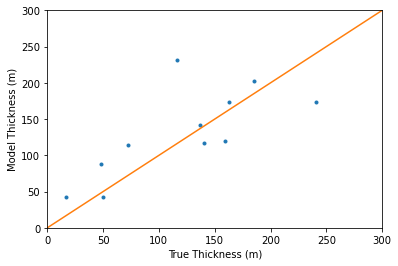

In [3]:
T_y = T_model.predict(T_test_features)
plt.plot(T_test_labels,T_y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

## T Linear regression loss

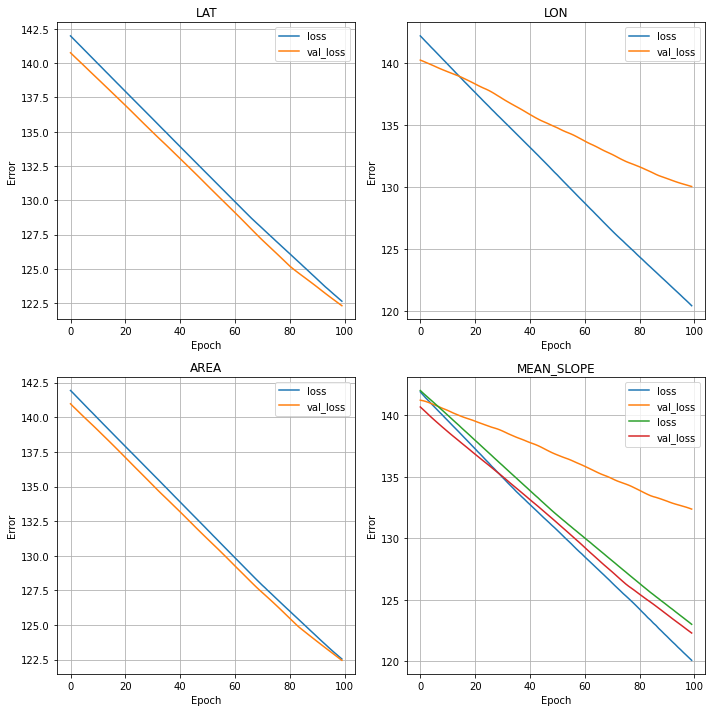

In [4]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
gl.plot_loss(T_linear_history[variable_name])
for i, variable_name in enumerate(T_variable_list):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(T_linear_history[variable_name])
#     ax.set_ylim([13,22])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

<function glacierml.plot_loss(history)>

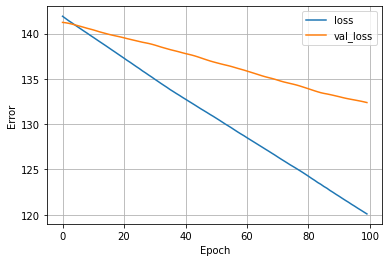

In [5]:
gl.plot_loss(T_linear_history['MULTI'])

## T DNN regression loss

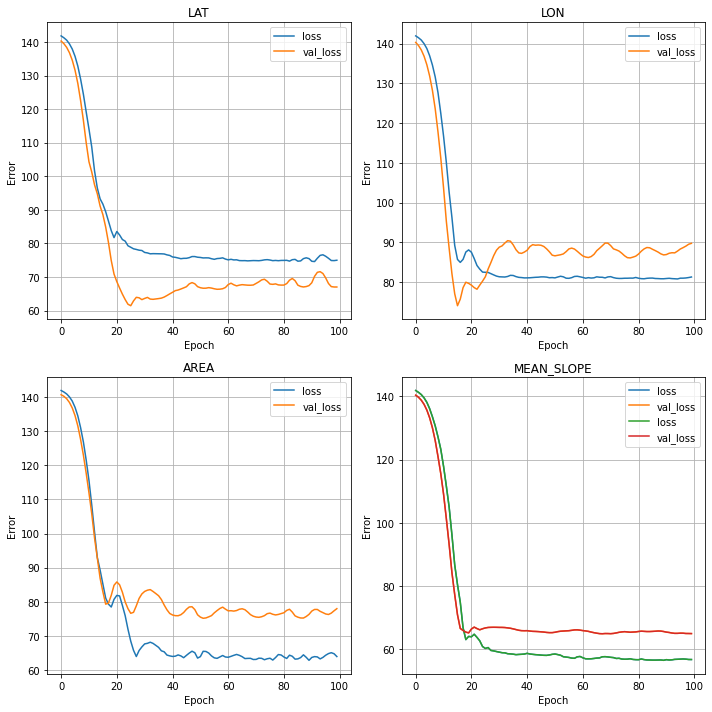

In [6]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
gl.plot_loss(T_dnn_history[variable_name])
for i, variable_name in enumerate(T_variable_list):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(T_dnn_history[variable_name])
#     ax.set_ylim([13,22])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP1_dnn_loss.eps")
plt.tight_layout()

<function glacierml.plot_loss(history)>

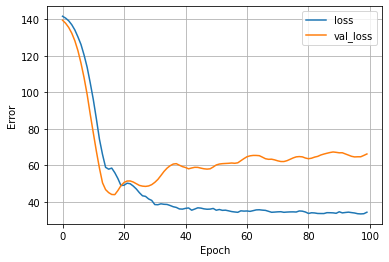

In [7]:
gl.plot_loss(T_dnn_history['MULTI'])

# TT model

In [8]:
TT = pd.read_csv('/home/sa42/data/glac/T_models/TT.csv')
TT = TT[[
    'LOWER_BOUND',
    'UPPER_BOUND',
    'AREA',
    'MEAN_SLOPE',
    'MAXIMUM_THICKNESS'
]]
TT = TT.dropna()
TT_train_dataset = TT.sample(frac=0.8, random_state=0)
TT_test_dataset = TT.drop(TT_train_dataset.index)
TT_train_features = TT_train_dataset.copy()
TT_test_features = TT_test_dataset.copy()
TT_train_labels = TT_train_features.pop('MAXIMUM_THICKNESS')
TT_test_labels = TT_test_features.pop('MAXIMUM_THICKNESS')

TT_model =  tf.keras.models.load_model(
    '/home/sa42/notebooks/glac/beta/saved_models/TT_dnn_multivariable')

TT_y = TT_model.predict(TT_test_features)

TT_variable_list = list(TT_train_features)

TT_linear_history = {}
for variable_name in TT_variable_list + ['MULTI']:
    TT_linear_history[variable_name] = pd.read_csv(
    '/home/sa42/notebooks/glac/beta/saved_results/TT_linear_history'+str([variable_name]))
    TT_linear_history[variable_name] = TT_linear_history[variable_name][[
        'loss',
        'val_loss'
    ]]

TT_dnn_history = {}
for variable_name in TT_variable_list + ['MULTI']:
    TT_dnn_history[variable_name] = pd.read_csv(
    '/home/sa42/notebooks/glac/beta/saved_results/TT_dnn_history'+str([variable_name]))
    TT_dnn_history[variable_name] = TT_dnn_history[variable_name][[
        'loss',
        'val_loss'
    ]]

## TT Prethicktions

(0.0, 300.0)

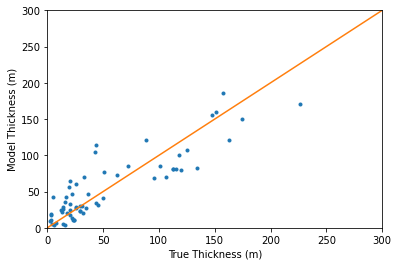

In [9]:
plt.plot(TT_test_labels,TT_y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

## TT Linear regression loss

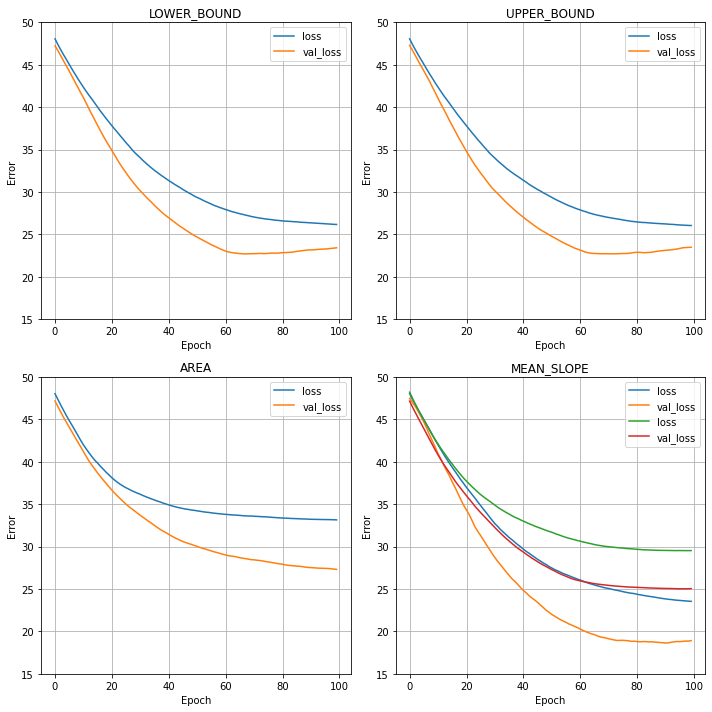

In [10]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
gl.plot_loss(TT_linear_history[variable_name])
for i, variable_name in enumerate(TT_variable_list):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(TT_linear_history[variable_name])
    ax.set_ylim([15,50])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_TT_linear_loss.eps")
plt.tight_layout()

<function glacierml.plot_loss(history)>

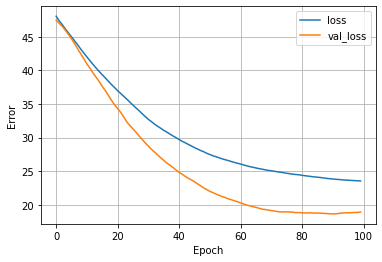

In [11]:
gl.plot_loss(TT_linear_history['MULTI'])

## TT DNN regression loss

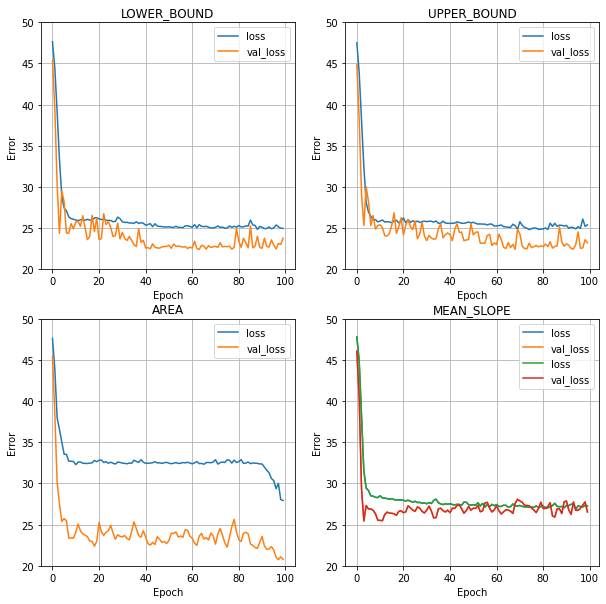

In [12]:
fig,ax=plt.subplots(2,2,figsize=(10,10))
fig.patch.set_facecolor('w')
gl.plot_loss(TT_dnn_history[variable_name])
for i, variable_name in enumerate(TT_variable_list):
    ax = plt.subplot(2,2,i+1)
    gl.plot_loss(TT_dnn_history[variable_name])
    ax.set_ylim([20,50])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_TT_dnn_loss.eps")
# plt.tight_layout()

<function glacierml.plot_loss(history)>

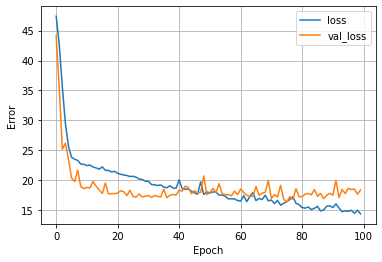

In [13]:
gl.plot_loss(TT_dnn_history['MULTI'])

In [14]:
TTT = pd.read_csv('/home/sa42/data/glac/T_models/TTT.csv')
TTT = TTT[[
    'POINT_LAT',
    'POINT_LON',
    'ELEVATION',
    'THICKNESS',
]]
TTT.dropna()
# TTT = TTT.dropna()
# TTT_train_dataset = TTT.sample(frac=0.8, random_state=0)
# TTT_test_dataset = TTT.drop(TTT_train_dataset.index)
# TTT_train_features = TTT_train_dataset.copy()
# TTT_test_features = TTT_test_dataset.copy()
# TTT_train_labels = TTT_train_features.pop('THICKNESS')
# TTT_test_labels = TTT_test_features.pop('THICKNESS')

# TTT_model =  tf.keras.models.load_model(
#     '/home/sa42/notebooks/glac/beta/saved_models/TTT_dnn_multivariable')


# TTT_variable_list = list(TTT_train_features) + ['MULTI']

# TTT_linear_history = {}
# for variable_name in TTT_variable_list + ['MULTI']:
#     TTT_linear_history[variable_name] = pd.read_csv(
#     '/home/sa42/notebooks/glac/beta/saved_results/TTT_linear_history'+str([variable_name]))
#     TTT_linear_history[variable_name] = TTT_linear_history[variable_name][[
#         'loss',
#         'val_loss'
#     ]]
# TTT_dnn_history = {}
# for variable_name in TTT_variable_list + ['MULTI']:
#     TTT_dnn_history[variable_name] = pd.read_csv(
#     '/home/sa42/notebooks/glac/beta/saved_results/TTT_dnn_history'+str([variable_name]))
#     TTT_dnn_history[variable_name] = TTT_dnn_history[variable_name][[
#         'loss',
#         'val_loss'
#     ]]

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,POINT_LAT,POINT_LON,ELEVATION,THICKNESS
0,48.767380,-121.819644,2962.0,0
1,48.764904,-121.821909,2813.0,29
2,48.761662,-121.825264,2598.0,41
3,48.757063,-121.829107,2383.0,71
4,48.753715,-121.832006,2284.0,82
...,...,...,...,...
3854274,47.092690,12.380504,3329.0,36
3854275,47.093780,12.379642,3353.0,26
3854276,47.094839,12.378200,3381.0,39
3854277,47.094829,12.378174,3381.0,39


In [15]:

plt.plot(TTT_test_labels,TTT_y,'.')
plt.plot((0,300),(0,300),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,300))
plt.ylim((0,300))

NameError: name 'TTT_test_labels' is not defined

In [16]:
T = pd.read_csv('/home/sa42/data/glac/T_models/T.csv')
T = T.drop([
#     'GlaThiDa_ID',
    'POLITICAL_UNIT',
    'GLACIER_NAME',
    'GLACIER_DB',
    'GLACIER_ID',
#     'LAT',
#     'LON',
    'SURVEY_DATE',
    'ELEVATION_DATE',
#     'AREA',
#     'MEAN_SLOPE',
    'MEAN_THICKNESS',
    'MEAN_THICKNESS_UNCERTAINTY',
    'MAXIMUM_THICKNESS',
    'MAX_THICKNESS_UNCERTAINTY',
    'SURVEY_METHOD',
    'SURVEY_METHOD_DETAILS',
    'NUMBER_OF_SURVEY_POINTS',
    'NUMBER_OF_SURVEY_PROFILES',
    'TOTAL_LENGTH_OF_SURVEY_PROFILES',
    'INTERPOLATION_METHOD',
    'INVESTIGATOR',
    'SPONSORING_AGENCY',
    'REFERENCES',
    'DATA_FLAG',
    'REMARKS'
],axis=1)
T = T.dropna()

TTT = pd.read_csv('/home/sa42/data/glac/T_models/TTT.csv')
TTT = TTT.drop([
#     'GlaThiDa_ID',
    'POLITICAL_UNIT',
    'GLACIER_NAME',
    'SURVEY_DATE',
    'PROFILE_ID',
    'POINT_ID',
#     'POINT_LAT',
#     'POINT_LON',
#     'ELEVATION',
#     'THICKNESS',
    'THICKNESS_UNCERTAINTY',
    'DATA_FLAG',
    'REMARKS'
],axis=1)
TTT = TTT.dropna()

df = pd.merge(T,TTT, how='inner',on='GlaThiDa_ID')
df = df.drop([
    'GlaThiDa_ID'    
],axis=1)
df
# split data set into training and testing
TTTT_train_dataset = df.sample(frac=0.8, random_state=0)
TTTT_test_dataset = df.drop(TTTT_train_dataset.index)
TTTT_train_features = TTTT_train_dataset.copy()
TTTT_test_features = TTTT_test_dataset.copy()

#define label - attribute training to be picked
TTTT_train_labels = TTTT_train_features.pop('THICKNESS')
TTTT_test_labels = TTTT_test_features.pop('THICKNESS')

TTTT_variable_list = list(TTTT_train_features) + ['MULTI']




TTTT_linear_history = {}
for variable_name in TTTT_variable_list + ['MULTI']:
    TTTT_linear_history[variable_name] = pd.read_csv(
    '/home/sa42/notebooks/glac/beta/saved_results/TTTT_linear_history'+str([variable_name]))
    TTTT_linear_history[variable_name] = TTTT_linear_history[variable_name][[
        'loss',
        'val_loss'
    ]]
TTTT_dnn_history = {}
for variable_name in TTTT_variable_list + ['MULTI']:
    TTTT_dnn_history[variable_name] = pd.read_csv(
    '/home/sa42/notebooks/glac/beta/saved_results/TTTT_dnn_history'+str([variable_name]))
    TTTT_dnn_history[variable_name] = TTTT_dnn_history[variable_name][[
        'loss',
        'val_loss'
    ]]
TTTT_model = tf.keras.models.load_model(
    '/home/sa42/notebooks/glac/beta/saved_models/TTTT_dnn_multivariable')   

/home/sa42/miniconda3/envs/python-cartopy-f/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (2,4,5,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


(0.0, 800.0)

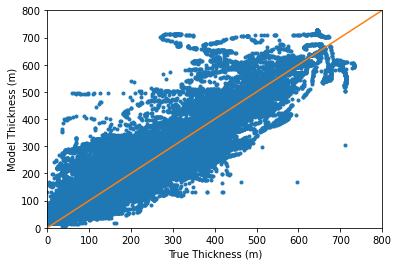

In [17]:
TTTT_y = TTTT_model.predict(TTTT_test_features)
plt.plot(TTTT_test_labels,TTTT_y,'.')
plt.plot((0,800),(0,800),'-')
plt.xlabel('True Thickness (m)')
plt.ylabel('Model Thickness (m)')
plt.xlim((0,800))
plt.ylim((0,800))

(array([1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 1.]),
 array([-1.51957485, -1.22476553, -0.92995621, -0.63514689, -0.34033758,
        -0.04552826,  0.24928106,  0.54409037,  0.83889969,  1.13370901,
         1.42851833,  1.72332764,  2.01813696,  2.31294628,  2.60775559,
         2.90256491,  3.19737423,  3.49218355,  3.78699286,  4.08180218,
         4.3766115 ]),
 <BarContainer object of 20 artists>)

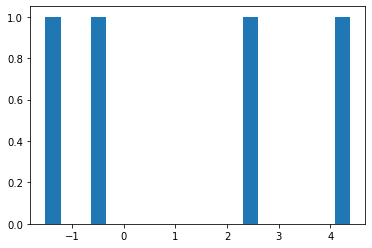

In [38]:
normed_residuals = (T_test_labels-T_y.flatten())/TTTT_test_labels

normed_residuals = normed_residuals [ np.isfinite(normed_residuals.to_numpy()) ]
np.mean(normed_residuals)
plt.subplots()
plt.hist( normed_residuals , 20)
# plt.yscale('log')

In [ ]:
fig,ax=plt.subplots(4,4,figsize=(10,10))
fig.patch.set_facecolor('w')
gl.plot_loss(TTTT_linear_history[variable_name])
for i, variable_name in enumerate(TTTT_variable_list):
    ax = plt.subplot(4,4,i+1)
    gl.plot_loss(TTTT_dnn_history[variable_name])
#     ax.set_ylim([20,50])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_TT_dnn_loss.eps")
plt.tight_layout()

In [ ]:
gl.plot_loss(TTTT_dnn_history['MULTI'])

In [ ]:
fig,ax=plt.subplots(4,4,figsize=(10,10))
fig.patch.set_facecolor('w')
gl.plot_loss(TTTT_dnn_history[variable_name])
for i, variable_name in enumerate(TTTT_variable_list):
    ax = plt.subplot(4,4,i+1)
    gl.plot_loss(TTTT_dnn_history[variable_name])
#     ax.set_ylim([20,50])
    ax.set_title(variable_name)
#     plt.savefig("/home/sa42/notebooks/glac/figs/GTP_TT_dnn_loss.eps")
plt.tight_layout()